# COGS 108 - EDA Checkpoint

## Names
- Mariam Bachar (A16217374)
- Alexandra Hernandez (A16730685)
- Brian Kwon (A16306826)
- Andrew Uhm (A16729684)
- Ethan Wang (A17229824)

## Research Question

Do certain keywords as identified by CLIP correlate with the popularity (as measured by the equivalent of “likes”) that artwork receives on social media?

## Setup

In [229]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import rankdata

import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\uhmji\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\uhmji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
# retrieving our deviation info.
csv_file = 'deviation_info.csv'
try:
    deviation_df = pd.read_csv(csv_file)
except:
    FileNotFoundError

In [55]:
deviation_df.head()

,Deviation ID,Title,Author,Views,Favorites,Comments,URL Link,Date Posted,Height,Width,File Size,Author Watchers,Author Page Views,Author Deviations
0,6797CD44-47EA-B405-9377-5D41D83F33FE,A l'aise...,thrumyeye,2022815,31101,2385,https://www.deviantart.com/thrumyeye/art/A-l-a...,2011-02-17 23:43:04,599,900,408379,36527,1354598,2179
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,Tiger cub,Kamirah,1271452,20720,2097,https://www.deviantart.com/kamirah/art/Tiger-c...,2008-07-11 06:10:53,800,800,523370,45123,7500677,358
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,Baby Steps 0268P,Sooper-Deviant,1097719,24050,937,https://www.deviantart.com/sooper-deviant/art/...,2009-10-05 06:55:37,400,400,4493241,35586,1438276,345
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,Sky Turtle,yuumei,1056323,23103,918,https://www.deviantart.com/yuumei/art/Sky-Turt...,2014-01-23 10:46:57,532,1000,390864,397714,22504533,842
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,Riders,sandara,1240225,15643,512,https://www.deviantart.com/sandara/art/Riders-...,2013-09-30 23:37:02,770,1200,832434,212588,7566524,796


In [56]:
# retrieving our CLIP caption info.
csv_file = 'caption_info.csv'
try:
    caption_df = pd.read_csv(csv_file)
except FileNotFoundError:
    caption_df = pd.DataFrame()

In [57]:
caption_df.head()

,Deviation ID,Caption
0,6797CD44-47EA-B405-9377-5D41D83F33FE,a red fox is sitting in the grass and looking ...
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,a tiger sitting on top of a rock in a forest w...
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,a red panda cub walking on a tree branch in th...
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,a bird flying through the air with its wings s...
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,a man riding on the back of a horse next to a ...


## Data Cleaning

We have previously checked for N/A values to drop and have already removed duplicates when constructing our datasets. There's still a couple of things to do; first, let's join our dataframes together based on their common ID for easier usage later:

In [58]:
# joining the two dataframes for good measure.
df = pd.merge(deviation_df, caption_df, on='Deviation ID', how='inner')
df.head()

,Deviation ID,Title,Author,Views,Favorites,Comments,URL Link,Date Posted,Height,Width,File Size,Author Watchers,Author Page Views,Author Deviations,Caption
0,6797CD44-47EA-B405-9377-5D41D83F33FE,A l'aise...,thrumyeye,2022815,31101,2385,https://www.deviantart.com/thrumyeye/art/A-l-a...,2011-02-17 23:43:04,599,900,408379,36527,1354598,2179,a red fox is sitting in the grass and looking ...
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,Tiger cub,Kamirah,1271452,20720,2097,https://www.deviantart.com/kamirah/art/Tiger-c...,2008-07-11 06:10:53,800,800,523370,45123,7500677,358,a tiger sitting on top of a rock in a forest w...
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,Baby Steps 0268P,Sooper-Deviant,1097719,24050,937,https://www.deviantart.com/sooper-deviant/art/...,2009-10-05 06:55:37,400,400,4493241,35586,1438276,345,a red panda cub walking on a tree branch in th...
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,Sky Turtle,yuumei,1056323,23103,918,https://www.deviantart.com/yuumei/art/Sky-Turt...,2014-01-23 10:46:57,532,1000,390864,397714,22504533,842,a bird flying through the air with its wings s...
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,Riders,sandara,1240225,15643,512,https://www.deviantart.com/sandara/art/Riders-...,2013-09-30 23:37:02,770,1200,832434,212588,7566524,796,a man riding on the back of a horse next to a ...


We want to anonymize the data to maintain ethical integrity as discussed in our project proposal. Let's remove the Author field, as it doesn't contribute anything otherwise. We don't need the URL anymore and it also reveals the author on top of that, so we remove it too. We are essentially using the caption in place of the title, so we will disregard it. We also acknowledge that webpage "views" can be manipulated by bots. The views on the deviation (read: artwork) are still relevant despite knowing that, but the views on the Author's page matter less so. Let's remove that also:

In [59]:
df = df.drop('URL Link', axis=1)
df = df.drop('Author', axis=1)
df = df.drop('Author Page Views', axis=1)
df = df.drop('Title', axis=1)

In [60]:
df.head()

,Deviation ID,Views,Favorites,Comments,Date Posted,Height,Width,File Size,Author Watchers,Author Deviations,Caption
0,6797CD44-47EA-B405-9377-5D41D83F33FE,2022815,31101,2385,2011-02-17 23:43:04,599,900,408379,36527,2179,a red fox is sitting in the grass and looking ...
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,1271452,20720,2097,2008-07-11 06:10:53,800,800,523370,45123,358,a tiger sitting on top of a rock in a forest w...
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,1097719,24050,937,2009-10-05 06:55:37,400,400,4493241,35586,345,a red panda cub walking on a tree branch in th...
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,1056323,23103,918,2014-01-23 10:46:57,532,1000,390864,397714,842,a bird flying through the air with its wings s...
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,1240225,15643,512,2013-09-30 23:37:02,770,1200,832434,212588,796,a man riding on the back of a horse next to a ...


We can justify the rest of the columns. We need the ID for identification purposes. The title may relate to the CLIP caption. The views, favorites, and comments are how we are gauging the popularity of the post. The date posted is relevant for trend analysis. The file size, height, and width implies the rendering definition (e.g. 1080px) of the work. Author watchers and deviations may imply how much experience or traction this author has had on DeviantArt. Finally, the CLIP caption is integral to our hypothesis.

Now we consider adjusting the string-based content of our data. Below we notice that the AI caption is longer than we need it to be:

In [62]:
for n in range(0, 1000, 200):
    print(df['Caption'][n])
    print()

a red fox is sitting in the grass and looking at the camera with a sad look on its face, Arie Smit, animal photography, a stock photo, furry art

a drawing of a bunch of arrows with different designs on them and numbers on them, all of which are different, Évariste Vital Luminais, tarot card, concept art, symbolism

a painting of a winged creature standing in a forest next to a lake with a waterfall in the background, Bastien Lecouffe-Deharme, magic the gathering artwork, concept art, fantasy art

a drawing of a umbrella and a clock on a book page with a pen and ink drawing of a woman holding an umbrella, Farel Dalrymple, illustrated, a storybook illustration, pop surrealism

a drawing of a woman with blue hair and a blue eyeliner on a notebook with a pen and a pen, Android Jones, trending on art station, a watercolor painting, process art



Notice that mainly what is before the first comma is the only relevant part of the caption. Furthermore, the AI makes a guess at who made the picture after the first comma. Let's remove everything after the first comma:

In [63]:
for n in range(df['Caption'].size):
    before_comma = df['Caption'][n].split(",")[0]
    df.loc[n, 'Caption'] = before_comma

In [64]:
df['Caption'][30]

'a forest with a lot of trees and snow on the ground and sun shining through the trees and the ground'

Now the caption is much more precise. However, we do not want the stopwords such as "a", "is", "the", etc. within our analysis, as they are irrelevant. Let's remove them:

In [78]:
stopwords = set(stopwords.words('english'))
for n in range(df['Caption'].size):
    tokens = word_tokenize(df['Caption'][n])
    filtered_text = [word for word in tokens if word not in stopwords]
    filtered_caption = ' '.join(filtered_text)
    df.loc[n, 'Caption'] = filtered_caption

In [82]:
df['Caption'][30]

'forest lot trees snow ground sun shining trees ground'

This will do.

## Data Analysis and Results

Describe how EDA works here and what is being explored

In [126]:
df.head()

,Deviation ID,Views,Favorites,Comments,Date Posted,Height,Width,File Size,Author Watchers,Author Deviations,Caption
0,6797CD44-47EA-B405-9377-5D41D83F33FE,2022815,31101,2385,2011-02-17 23:43:04,599,900,408379,36527,2179,red fox sitting grass looking camera sad look ...
1,83750DFB-D23E-00A3-DF4F-D164A07DF605,1271452,20720,2097,2008-07-11 06:10:53,800,800,523370,45123,358,tiger sitting top rock forest leaves flowers a...
2,8F1ED8A1-88A5-861A-F83B-77916A1481A0,1097719,24050,937,2009-10-05 06:55:37,400,400,4493241,35586,345,red panda cub walking tree branch forest
3,66D5BA39-C0D4-7A95-52FF-C0694149142E,1056323,23103,918,2014-01-23 10:46:57,532,1000,390864,397714,842,bird flying air wings spread lot birds flying ...
4,1C127EBF-EFF7-7BC4-004D-0355A2856C05,1240225,15643,512,2013-09-30 23:37:02,770,1200,832434,212588,796,man riding back horse next bird flying snowy s...


In [ ]:
# TODO:
# define the popularity metric using views, favorites, and comments fields
# draw out popularity trends based on date posted then normalize if issue
# we have 3 relationships we have to draw out: popularity with fileSizeAndQuality, authorExperience, and the AICaption.
# we then want to make some sort of statistical test that says popularity is not related to fileSizeAndQuality or authorExperience
# but also a test that says popularity IS related to the AICaption.
# REMEMBER that it's not critical that these tests pass; these are just the test results we need to confirm our hypothesis. 
#       if our hypothesis is wrong, no big deal

We first need to define a popularity metric in order to do meaningful analysis. We explore the views, favorites, comments, and author watcher fields to get an idea of what a reasonable metric to measure popularity would look like.

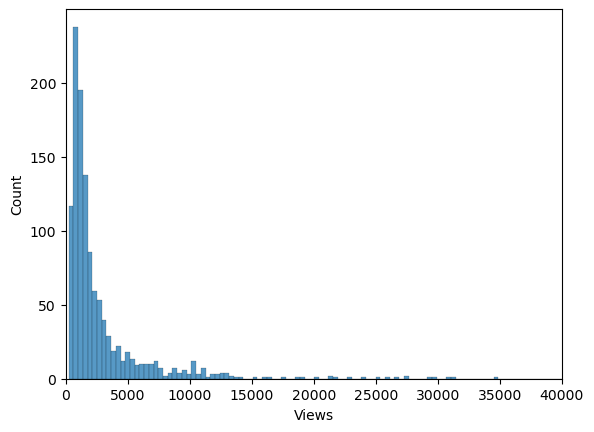

In [162]:
sns.histplot(df['Views']/100)
plt.xlim(0, 40000)
plt.show()

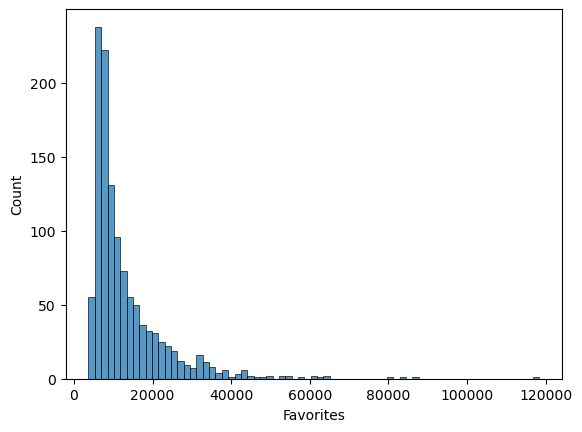

In [129]:
sns.histplot(df['Favorites'])
plt.show()

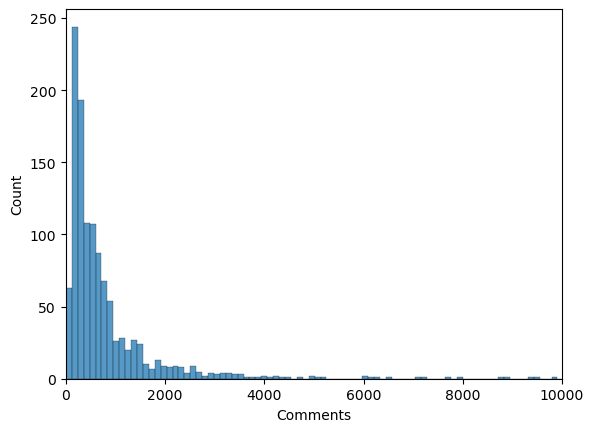

In [158]:
sns.histplot(df['Comments'])
plt.xlim(0, 10000)
plt.show()

We notice that the distribution for views, favorites, and comments are all similar but differ obviously on the scale. There are a handful of outliers here and there (two points at around 10 million and 6 million are excluded in the views plot and around 5 points above 10 thousand were excluded in the comments plot), but for the most part most people do not get a lot of interaction on their posts (which is how popularity intuitively works).

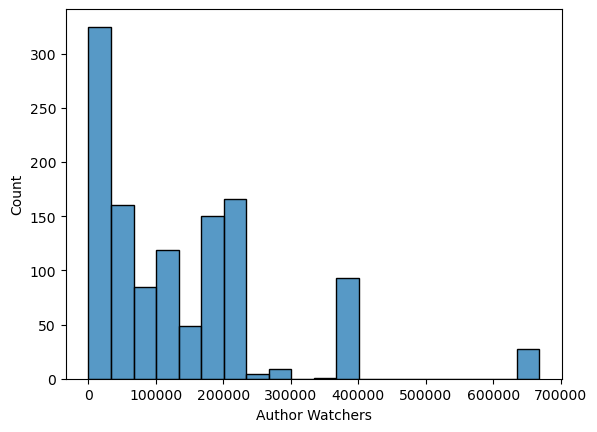

In [132]:
sns.histplot(df['Author Watchers'])
plt.show()

Author distribution is certainly not normal but not necessarily as clearly right-skewed as the popularity metrics.

We note that to put the popularity distributions on a similar scale, we can use the scale factors below:

In [163]:
view_scale_factor = 0.01
favorite_scale_factor = 1.0
comment_scale_factor = 10.0

Finally we can divide by Author Watcher count to normalize popularity based on how large a following an author already has (and thus has contributed to the popularity of the artwork):

In [178]:
popularity_metrics = []
for n in range(df.shape[0]):
    view_count = df['Views'][n]
    favorite_count = df['Favorites'][n]
    comment_count = df['Comments'][n]
    watcher_count = df['Author Watchers'][n]
    popularity_metric = (view_count*view_scale_factor + favorite_count*favorite_scale_factor + comment_count*comment_scale_factor) / watcher_count
    popularity_metrics.append(popularity_metric * 10)

In [232]:
testing = pd.DataFrame(popularity_metrics)
testing.describe()
# there are some crazy outliers!!!!! Let's use ranking statistics to fix this
ranking = pd.DataFrame(rankdata(testing))
ranking

,0
0,1023.0
1,953.0
2,957.0
3,458.0
4,562.0
...,...
1183,652.0
1184,1020.0
1185,869.0
1186,1178.0


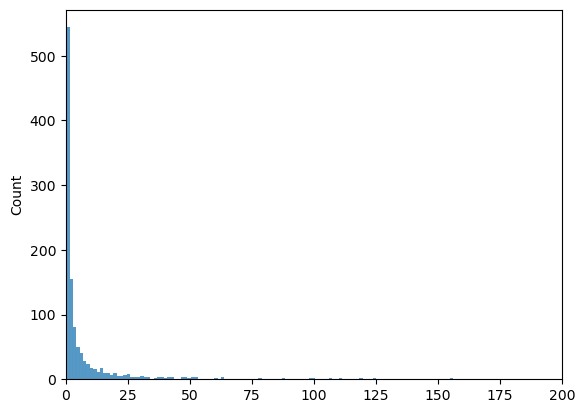

In [227]:
sns.histplot(popularity_metrics)
plt.xlim(0, 200)
plt.show()

a drawing of a wolf on a notebook with a pen and a marker next to it on a table, Anato Finnstark, in gouache detailed paintings, a watercolor painting, furry art


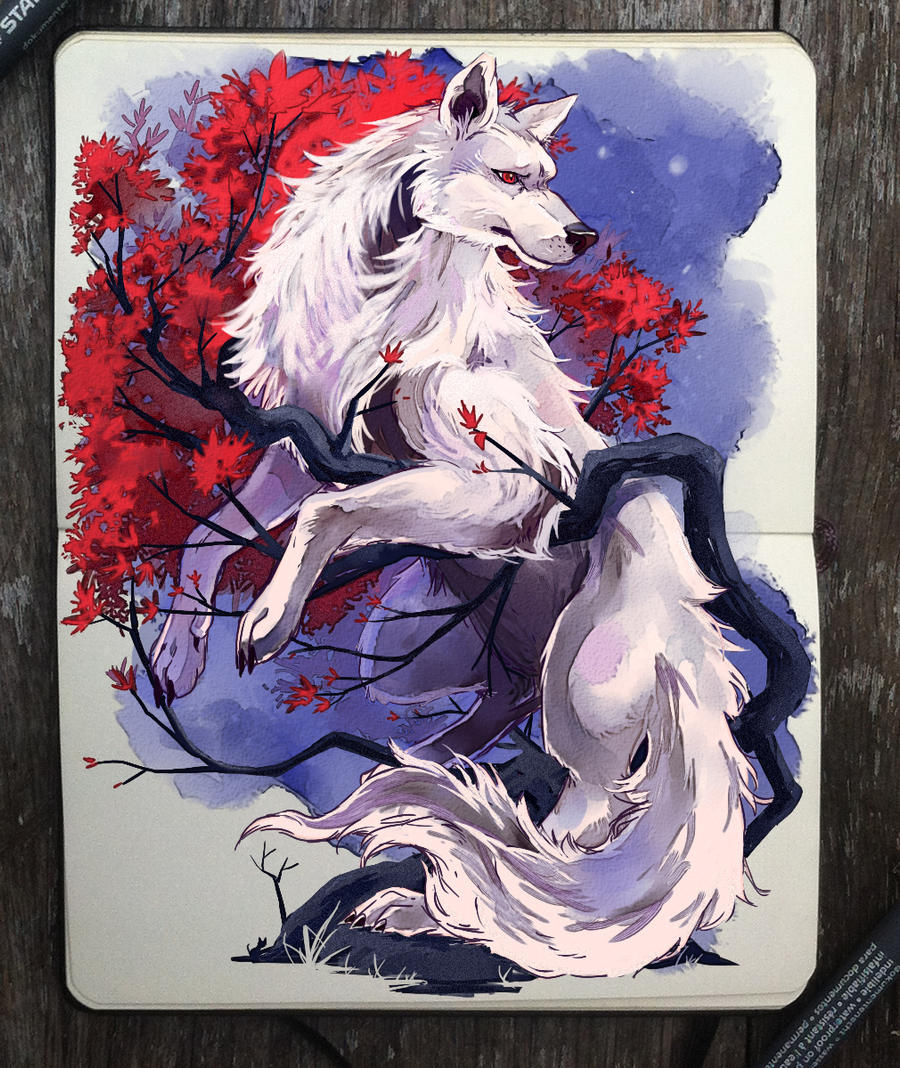

In [120]:
# show two images from our dataset with the caption for good measure.
wolf_on_tree = './images/0E4DB685-1333-BDDA-2FD7-7AC0ABF72136.png'
print(caption_df[caption_df['Deviation ID'] == '0E4DB685-1333-BDDA-2FD7-7AC0ABF72136'].loc[300][1])
Image(filename=wolf_on_tree)

a black and white photo of a castle with a clock tower on top of it's roof and a clock on the top of the tower, Beeple, detailed render, an ambient occlusion render, pixel art


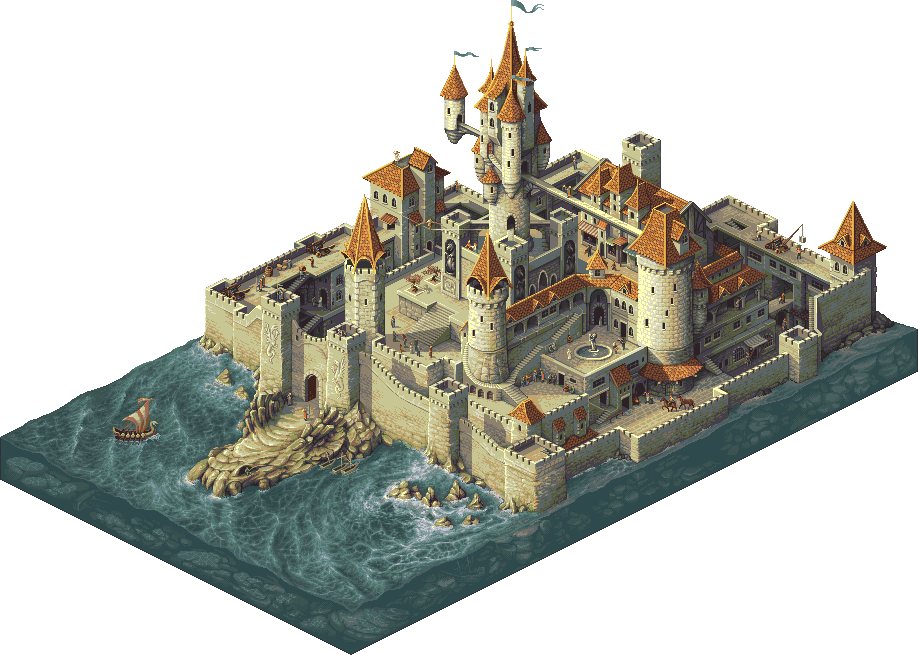

In [118]:
castle_in_moat = './images/11A3297B-3E21-F44E-5D41-236B22EAE0C7.png'
print(caption_df[caption_df['Deviation ID'] == '11A3297B-3E21-F44E-5D41-236B22EAE0C7'].loc[434][1])
Image(filename=castle_in_moat)